**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: <font color="#0679c8">Rodrigo González Rodríguez</font>
*   MATRÍCULA: <font color="#0679c8">A01796932</font>
*   NOMBRE: <font color="#0679c8">Wilson Edilmar Sanchez Hernandez</font>
*   MATRÍCULA: <font color="#0679c8">A01796996</font>
*   NOMBRE: <font color="#0679c8">Jorge Alberto Garcia Cardenas</font>
*   MATRÍCULA: <font color="#0679c8">A01796341</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/01 - Ciencia y analítica de datos/7.2 - PCA"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

<font color="#0679c8">Tenemos un dataframe de 77 filas y 16 columnas, donde aparentemente hay 3 variables categoricas y 13 cuantitativas </font>

In [5]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


<font color="#0679c8">Analisis para variables categoricas</font>

In [6]:
cereals_df.describe(include='object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


<font color="#0679c8">Analisis para variables cuantitativas</font>

In [7]:
cereals_df.describe(include='number')

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

<font color="#0679c8">Para 'mfr' tenemos 7 categorias, siendo "Kellogs" la mas frecuentes, apareciendo 23 veces en el dataframe</font>

In [8]:
cereals_df['mfr'].value_counts()

,count
mfr,
K,23
G,22
P,9
Q,8
R,8
N,6
A,1


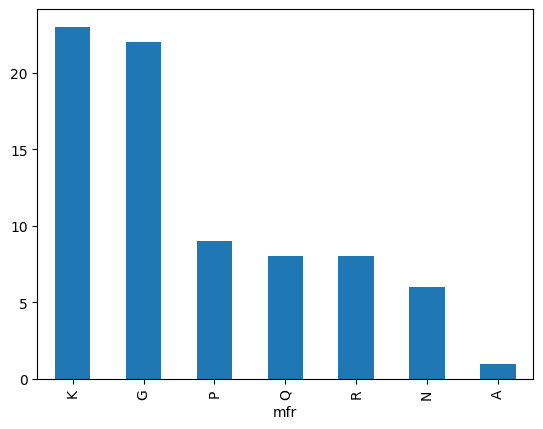

In [9]:
cereals_df['mfr'].value_counts().plot(kind='bar')
plt.show()

<font color="#0679c8">Para 'shelf' solo tenemos 3 categorias, siendo "3" la mas frecuentes, apareciendo 36 veces en el dataframe</font>

In [10]:
cereals_df['shelf'].value_counts()

,count
shelf,
3,36
2,21
1,20


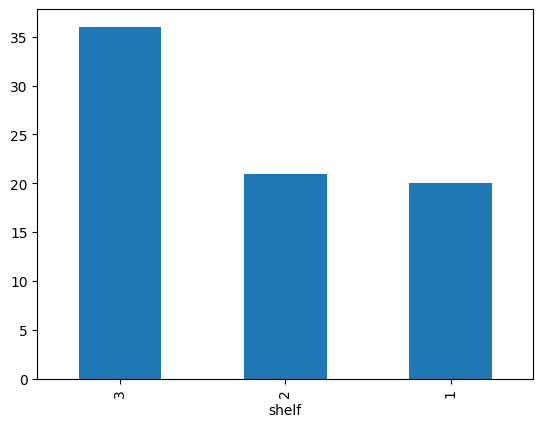

In [11]:
cereals_df['shelf'].value_counts().plot(kind='bar')
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

<font color="#0679c8">El fabricante con mayor cantidad de productos por estantes fue mfr = Kellogs en shelf = 3 con 12 productos</font>

In [12]:
cereals_df.groupby(['mfr', 'shelf']).size()

mfr  shelf
A    2         1
G    1         6
     2         7
     3         9
K    1         4
     2         7
     3        12
N    1         3
     2         2
     3         1
P    1         2
     2         1
     3         6
Q    1         1
     2         3
     3         4
R    1         4
     3         4
dtype: int64

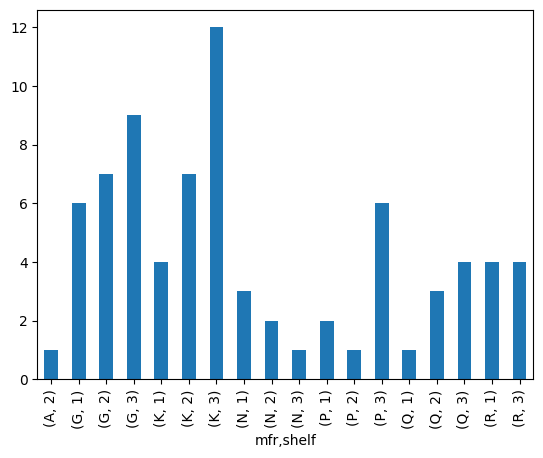

In [13]:
cereals_df.groupby(['mfr', 'shelf']).size().plot(kind='bar')
plt.show()

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

<font color="#0679c8">El rango con mas frecuencia en rating es de 39.6 a 41.2 </font>

In [14]:
#Definimos 50 bins entre el valor minimo y maximo de 'rating'
bins = np.linspace(cereals_df['rating'].min(), cereals_df['rating'].max(), 50)
#Segmentamos el DF
rating_bin = pd.cut(cereals_df['rating'], bins)
bin_counts = rating_bin.value_counts().sort_index()
#Imprimimos el rango con mas frecuencia
bin_counts.idxmax()

Interval(39.661, 41.205, closed='right')

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

<font color="#0679c8">Los cereales mejor evaluados van desde 59.12 hasta 93.7, perteneciendo a fabricantes como "Kellogs","Nabisco" y "Quaker Oats" </font>

In [15]:
cereals_df[['name','mfr','rating']].sort_values('rating', ascending=False).head(10)

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

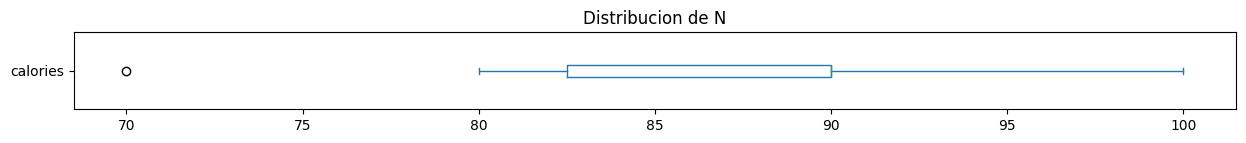

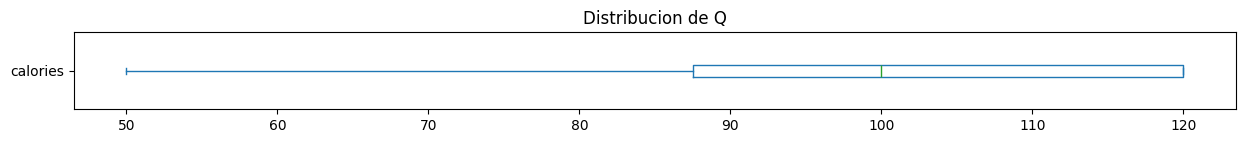

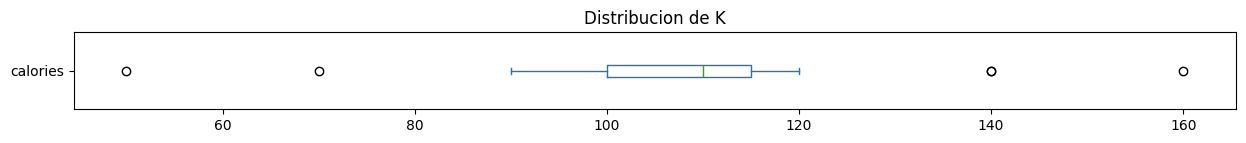

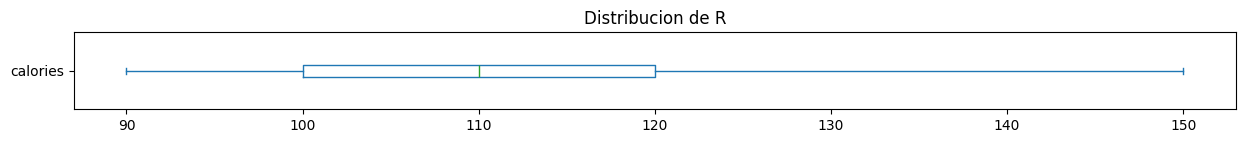

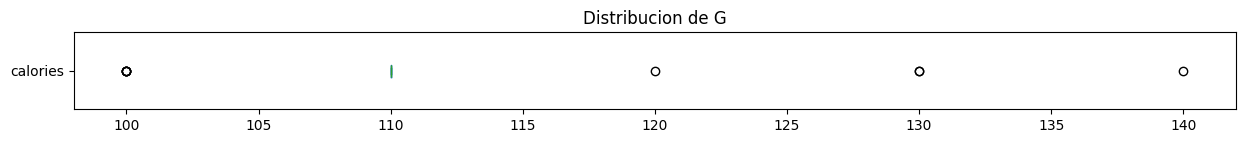

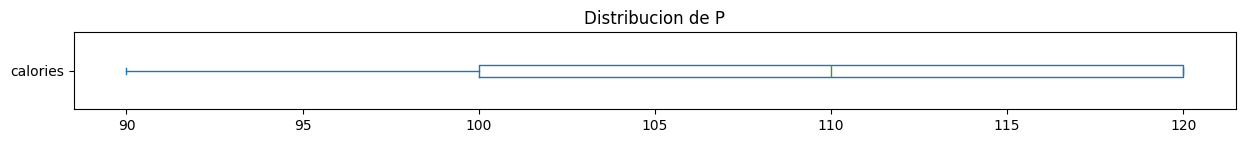

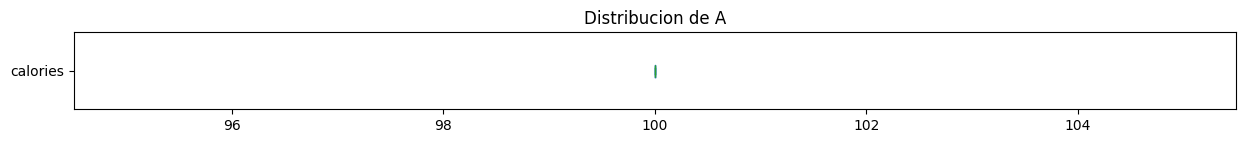

In [16]:
for mfr in cereals_df['mfr'].unique().tolist():
  plt.figure(figsize=(15, 1))
  plt.title(f'Distribucion de {mfr}')
  cereals_df[cereals_df['mfr'] == mfr]['calories'].plot.box(vert=False)
  plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

<font color="#0679c8">'fiber' tiene la mayor correlacion con 0.58, seguido de 'protein' con 0.47</font>

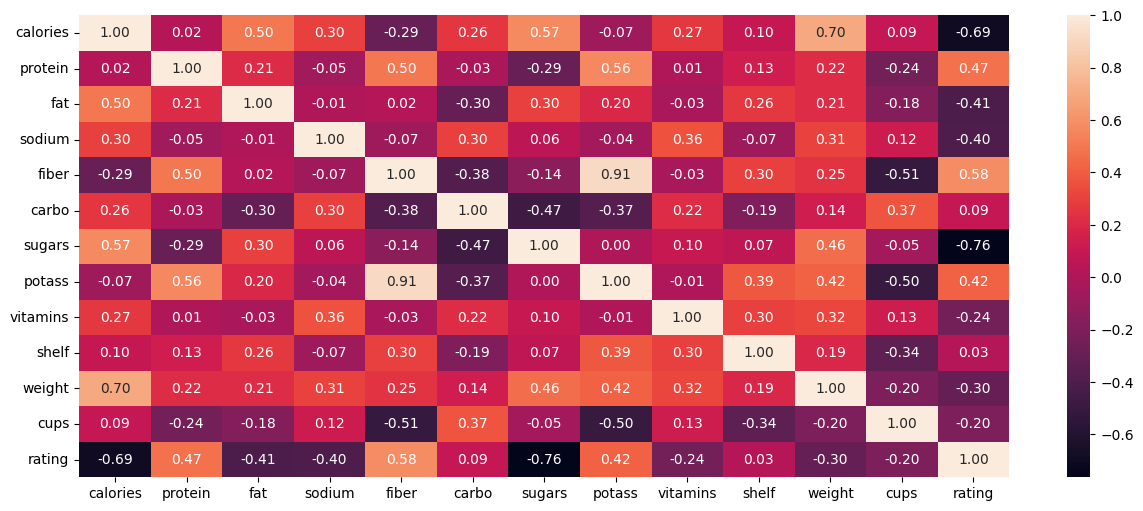

In [17]:
plt.figure(figsize=(15, 6))
sns.heatmap(cereals_df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

In [18]:
#Filtramos los valores con mayor correlacion en una lista
cereals_df.corr(numeric_only=True)[['rating']].sort_values('rating', ascending=False).head(3)

,rating
rating,1.000000
fiber,0.584160
protein,0.470618


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

<font color="#0679c8">Se eliminaron solo 3 filas, dataset paso de 77 a 74 filas</font>

In [19]:
cereals_df = cereals_df.dropna().reset_index(drop=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [20]:
#Filtramos las columnas numericas del DF
df_numerico = cereals_df.select_dtypes(include=['number'])
#Definimos X como las entradas, excluyendo 'rating'
x = df_numerico.iloc[:,0:-1]
#Definimos nuestra salida como 'rating'
y = df_numerico.loc[:,'rating']
#Guardamos los componentes totales
total_components = x.shape[1]

In [21]:
#Escalamos X
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [22]:
#Obtenemos el PCA
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,-0.247787,-0.124799,-0.046331,-0.238706,0.021342
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.895201,-0.835394,0.595071,-0.069954,-0.089523
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.182089,0.139267,-0.090776,0.488302,-0.035570
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.865569,-0.682678,-0.099300,-0.708471,0.108198
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,-0.808361,-0.712896,0.100511,-0.093129,-0.076342


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

<font color="#0679c8">El numero minimo de componentes para explicar mas de 90% es 7</font>

In [23]:
#Obtenemos los valores de la varianza por componente
variance_df = pd.DataFrame(columns=["explained_variance_","percentage_variance","cumsum_percentage_variance"])
for i in range(0, total_components):
  variance_df.loc[i] = [pca.explained_variance_[i], format(pca.explained_variance_ratio_[i]*100,'.0f'), format(np.cumsum(pca.explained_variance_ratio_)[i]*100,'.0f')]
variance_df

,explained_variance_,percentage_variance,cumsum_percentage_variance
0,3.364850,28,28
1,2.683433,22,50
2,1.810492,15,65
3,1.031509,8,73
4,0.997762,8,81
5,0.699228,6,87
6,0.668885,5,93
7,0.421766,3,96
8,0.318028,3,99
9,0.093055,1,99


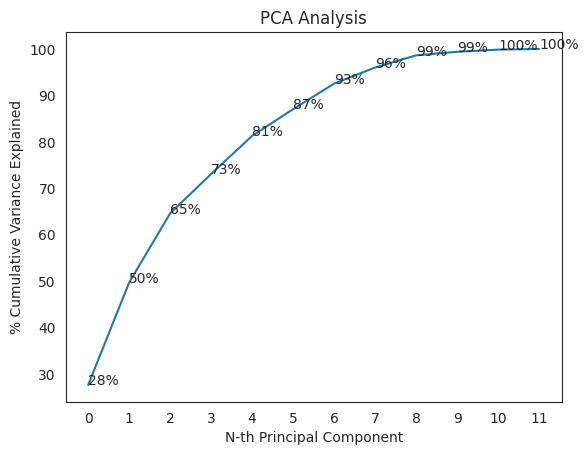

In [24]:
sns.set_style('white')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


<font color="#0679c8">La mas importante es 'potass'(0.50), seguido de 'fiver'(0.45) y 'cups'(0.37)</font>

In [25]:
num_components = 1
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.08144,0.502603,0.018839,0.308929,0.25716,0.371154


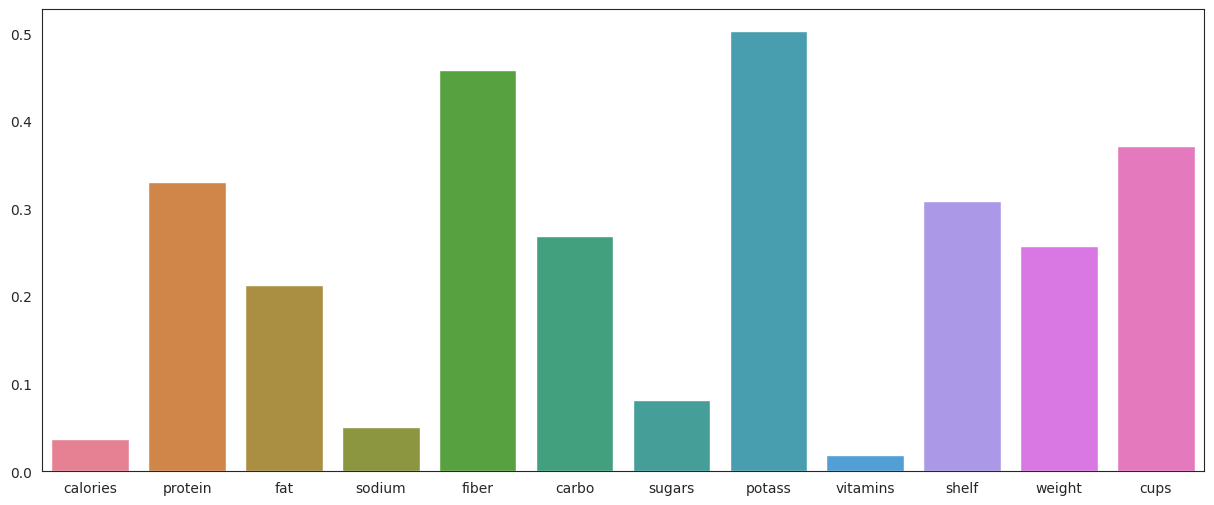

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(pc_df)
plt.show()

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

<font color="#0679c8">No todas las variables categoricas son predictores, la variable 'name' tiene valores distintos en cada uno de sus registros, no es util como predictor.</font>

In [27]:
#Analizamos la cardinalidad de las variables categoricas (object)
cereals_df.describe(include = 'object').T.unique

,unique
name,74
mfr,7
type,2


<font color="#0679c8">Seleccionamos el metodo "One-Hot" por ser variables categoricas de baja cardinalidad</font>

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_df = encoder.fit_transform(cereals_df[['mfr','type','shelf']])
onehot_df = pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out())
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [29]:
df = pd.concat([x_projected, onehot_df, y], axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,shelf_2,shelf_3,rating
0,4.870399,-2.934238,-0.055266,0.244647,-1.102035,0.904575,0.235388,-0.247787,-0.124799,-0.046331,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,1.761110,0.210993,-3.014058,-0.494129,3.275506,1.065041,-0.489640,0.895201,-0.835394,0.595071,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33.983679
2,4.727161,-2.402254,0.869028,-0.095823,-1.357388,1.393861,1.210340,0.182089,0.139267,-0.090776,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,5.142814,-4.401826,1.883153,0.209854,-1.662387,0.955808,-0.289695,0.865569,-0.682678,-0.099300,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,-0.332394,0.284619,-1.490929,-0.944313,-0.311262,0.828872,0.493652,-0.808361,-0.712896,0.100511,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,0.475067,1.161330,0.495373,0.749484,-0.773891,1.520184,0.690165,0.353600,0.017534,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.595568,0.574653,-1.671901,0.380863,-0.489233,0.116453,-0.204196,0.259556,-0.021133,0.100748,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,-0.134252,-0.612590,1.181098,-1.357046,-0.190222,0.163728,0.799693,-0.616101,-0.591177,-0.112252,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,49.787445
72,-0.674537,-0.568589,1.163186,-1.330649,0.088594,0.644712,-0.247744,0.009124,-0.604610,0.008312,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [30]:
df.to_csv('Actividad7PCA.csv', index=False)